<a href="https://colab.research.google.com/github/Vinuthnadivi/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the required dependencies

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the dataset to pandas dataframe

In [37]:
credit_card_data=pd.read_csv("creditcard.csv")

In [38]:
#first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
#last 5 rows of the datset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [40]:
#dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [41]:
#checking the no of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Distribution of legit transactions and fradulent transactions

In [42]:
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


This dataset is highly unbalanced.More than 99% of the data is in one particular classs.If we train the machine learning model using this data it cannot recognize the fradulent transaction because it has very less datapoints of this particular case.It will predict normal transaction.  

0->Normal Transaction 1->Fradulent Transaction

/tmp/ipython-input-43-4012753523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=credit_card_data['Class'],data=credit_card_data,palette="Set2");


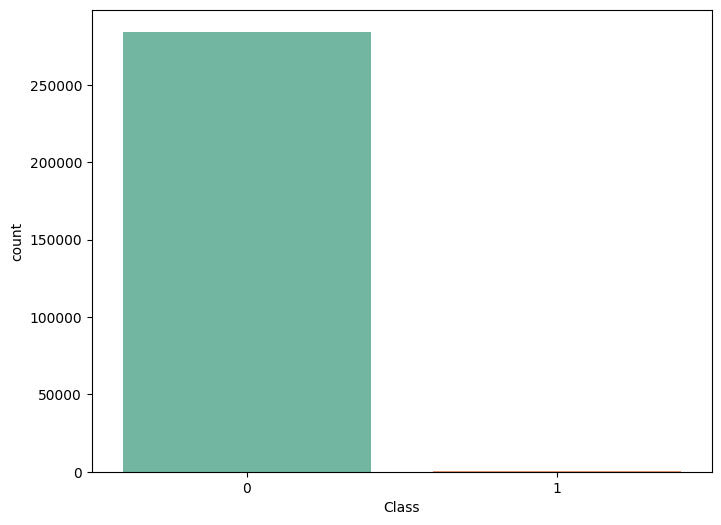

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(x=credit_card_data['Class'],data=credit_card_data,palette="Set2");

In [44]:
#separating the data for analysis
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]

In [45]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [46]:
#statistical measures of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [47]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [48]:
#compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Under-sampling

Build a sample dataset containing similiar distribution of normal transactions and fradulent transactions.Number of fradulent transactions->492

In [49]:
legit_sample=legit.sample(n=492) #picked randomly
legit_sample.shape

(492, 31)

Concatenating two dataframes

In [50]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
69600,53497.0,1.257919,0.615890,-0.680425,0.676887,0.354468,-0.936742,0.318270,-0.164480,-0.443320,...,-0.121157,-0.313443,-0.140150,-0.107079,0.593915,0.371254,-0.033241,0.029875,0.76,0
71244,54223.0,0.837115,-0.143818,0.505618,1.490404,0.069578,1.444423,-0.509263,0.564569,0.743201,...,0.075755,0.563749,-0.018014,-0.681552,0.306070,-0.175225,0.134332,0.051012,67.12,0
263895,161164.0,0.124239,1.022697,-0.396838,-0.543195,0.964143,-0.766086,0.965025,-0.095037,-0.075915,...,-0.331165,-0.795503,0.106636,0.549426,-0.430558,0.115969,0.225831,0.084697,3.99,0
123292,76872.0,1.015161,0.147201,-0.240992,1.262628,0.164383,-0.641721,0.649142,-0.260288,-0.414003,...,0.100972,0.142791,-0.216235,0.103821,0.745270,-0.263664,-0.011600,0.027796,112.99,0
50677,44599.0,1.175392,0.084307,0.486005,0.463389,-0.319896,-0.220114,-0.185398,0.135161,-0.072342,...,-0.189856,-0.596277,0.165674,-0.013741,0.082520,0.110274,-0.022518,0.003186,0.89,0


In [51]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [52]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


/tmp/ipython-input-53-2353798741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_dataset['Class'],data=new_dataset,palette="Set2")


<Axes: xlabel='Class', ylabel='count'>

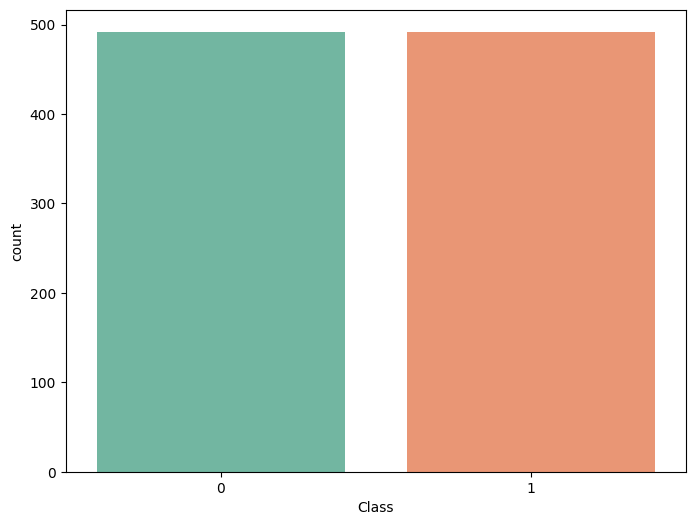

In [53]:
plt.figure(figsize=(8,6))
sns.countplot(x=new_dataset['Class'],data=new_dataset,palette="Set2")

From the above plot we can say that our dataset is now balanced and we can now apply any classification algorithm.So we are applying logistic regression.

In [54]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,99623.583333,0.101919,-0.016216,-0.055902,-0.090536,0.057736,-0.068910,-0.033710,0.050274,0.093092,...,-0.017753,0.018340,-0.008999,-0.011169,-0.036511,-0.008693,0.002196,0.000340,0.004477,76.735772
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into features and targets

In [55]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [56]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
69600    53497.0  1.257919  0.615890 -0.680425  0.676887  0.354468 -0.936742   
71244    54223.0  0.837115 -0.143818  0.505618  1.490404  0.069578  1.444423   
263895  161164.0  0.124239  1.022697 -0.396838 -0.543195  0.964143 -0.766086   
123292   76872.0  1.015161  0.147201 -0.240992  1.262628  0.164383 -0.641721   
50677    44599.0  1.175392  0.084307  0.486005  0.463389 -0.319896 -0.220114   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [57]:
print(Y)

69600     0
71244     0
263895    0
123292    0
50677     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [59]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


# Model Training

In [60]:
model=LogisticRegression()

In [61]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [62]:
#accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print("Accuracy score on training data",training_data_accuracy)

Accuracy score on training data 0.9390088945362135


In [63]:
#accuracy on testing data
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print("Accuracy score on test data",testing_data_accuracy)

Accuracy score on test data 0.9086294416243654


In [64]:
cm=confusion_matrix(Y_test,X_test_prediction)
print("confusion matrix:",cm)
print("accuracy score:",accuracy_score(Y_test,X_test_prediction))
print("classification report:")
print(classification_report(Y_test,X_test_prediction))

confusion matrix: [[94  5]
 [13 85]]
accuracy score: 0.9086294416243654
classification report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        99
           1       0.94      0.87      0.90        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197

